# Assignment
When a consumer places an order on DoorDash, we show the expected time of delivery. It is very important for DoorDash to get this right, as it has a big impact on consumer experience. In this exercise, you will build a model to predict the estimated time taken for a delivery.

Concretely, for a given delivery you must predict the **total delivery duration seconds** , i.e., the time taken from

Start: the time consumer submits the order (`created_at`) to
End: when the order will be delivered to the consumer (`actual_delivery_time`)

# Data Preparation for Modeling

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
historical_data = pd.read_csv('../datasets/doordash_historical_data.csv')
historical_data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [11]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

- `created_at` and `actual_delivery_time` are not in timestamps format, they're objects

In [12]:
historical_data['created_at'] = pd.to_datetime(historical_data['created_at'])
historical_data['actual_delivery_time'] = pd.to_datetime(historical_data['actual_delivery_time'])
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

## Feature Creation

1. The target variable

In [13]:
from datetime import datetime

historical_data['actual_total_delivery_duration'] = (historical_data['actual_delivery_time'] - historical_data['created_at']).dt.total_seconds()
historical_data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0


2. Busy Dashers Ratio
- The number of total dashers and number of busy dashers at any given time of order placement is useful.
- But both are subject to changes based on area and time
- So, a better variable would be the ratio of busy dashers to total available dashers at any time and place.
- Higher the ratio, longer the wait times.

In [14]:
historical_data['busy_dashers_ratio'] = historical_data['total_busy_dashers'] / historical_data['total_onshift_dashers']
historical_data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ratio
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,0.424242
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,2.000000
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,0.000000
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,1.000000
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1.000000


3. Non-preparation Duration
- Idea is to separate preparation duration (under restaurant's control) and non-preparation duration (not under restaurant's control)
- We have `estimated_order_place_duration` and `estimated_store_to_consumer_driving_duration`; we need to sum them to get the non-preparation duration

In [15]:
historical_data['estimated_non_prep_duration'] = historical_data['estimated_order_place_duration'] + historical_data['estimated_store_to_consumer_driving_duration']

## Data Preparation for modeling
- Let's start with nominal variables: `market_id`, `store_id` and `order_protocol`
- We need to one-hot encode them because they're nominal (not ordinal)
- But before we do that, we need to check the number of unique values of all of them (if there are too many, the feature set will explode)

In [16]:
print("Number of unique market ids", historical_data['market_id'].nunique())
print("Number of unique store ids", historical_data['store_id'].nunique())
print("Number of unique order protocols", historical_data['order_protocol'].nunique())

Number of unique market ids 6
Number of unique store ids 6743
Number of unique order protocols 7


- We can one-hot encode `market_id` and `order_protocol` but not `store_id`

In [17]:
# create dummies for the order protocol
order_protocol_dummies = pd.get_dummies(historical_data['order_protocol'])
order_protocol_dummies = order_protocol_dummies.add_prefix('order_protocol_')
order_protocol_dummies.head()

,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [18]:
# create dummies for the market id
market_id_dummies = pd.get_dummies(historical_data['market_id'])
market_id_dummies = market_id_dummies.add_prefix('market_id_')
market_id_dummies.head()

,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


- Forget about `store_id` and instead focus on `store_primary_category`
- From the `.info()` cell earlier, we can see that there are missing values in the column
- We need to do missing value imputation
- We can use the most common category (cuisine category that is) that a restaurant has among all their orders
- We will use a reference dictionary for that

In [19]:
# create a dictionary with most repeated categories of each store to fill NULL rows where it is possible
store_id_unique = historical_data['store_id'].unique().tolist()
store_id_and_category = {
    store_id: historical_data[historical_data['store_id'] == store_id]['store_primary_category'].mode()
    for store_id in store_id_unique
}

In [20]:
# using a custom function to fill the values
def fill(store_id):
    """Return primary store category from the dictionary"""
    try:
        return store_id_and_category[store_id].values[0]
    except:
        return np.nan

# fill NULL values
historical_data['nan_free_store_primary_category'] = historical_data['store_id'].apply(fill)
historical_data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ratio,estimated_non_prep_duration,nan_free_store_primary_category
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,0.424242,1307.0,american
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,2.000000,1136.0,indian
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,0.000000,1136.0,indian
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,1.000000,735.0,indian
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1.000000,1096.0,indian


In [21]:
# create dummies for store primary category
store_primary_category_dummies = pd.get_dummies(historical_data['nan_free_store_primary_category'])
store_primary_category_dummies = store_primary_category_dummies.add_prefix('category_')
store_primary_category_dummies.head()

,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,category_brazilian,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Let's create our training dataset by introducing these new columns and removing the old ones

In [22]:
train_df = historical_data.drop(columns=
['created_at', 'market_id', 'store_id', 'store_primary_category', \
    'actual_delivery_time', 'nan_free_store_primary_category', 'order_protocol'])
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ratio,estimated_non_prep_duration
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,0.424242,1307.0
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,2.000000,1136.0
2,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,0.000000,1136.0
3,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,1.000000,735.0
4,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1.000000,1096.0


- Concatenate `train_df` and the dummies
- Convert them to `float32` (for future model's sake?)

In [23]:
train_df = pd.concat([train_df, order_protocol_dummies, market_id_dummies, store_primary_category_dummies], axis=1)

In [24]:
# align dtype over dataset
train_df = train_df.astype('float32')
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,861.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0,446.0,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,6.0,6.0,9.0,446.0,650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_items,197428.0,3.196391,2.666546,1.0,2.0,3.0,4.0,411.0
subtotal,197428.0,2682.331543,1823.093750,0.0,1400.0,2200.0,3395.0,27100.0
num_distinct_items,197428.0,2.670791,1.630255,1.0,1.0,2.0,3.0,20.0
min_item_price,197428.0,686.218506,522.038635,-86.0,299.0,595.0,949.0,14700.0
max_item_price,197428.0,1159.588623,558.411377,0.0,800.0,1095.0,1395.0,14700.0
...,...,...,...,...,...,...,...,...
category_thai,197428.0,0.037254,0.189384,0.0,0.0,0.0,0.0,1.0
category_turkish,197428.0,0.001175,0.034260,0.0,0.0,0.0,0.0,1.0
category_vegan,197428.0,0.001433,0.037834,0.0,0.0,0.0,0.0,1.0
category_vegetarian,197428.0,0.004234,0.064935,0.0,0.0,0.0,0.0,1.0


In [26]:
train_df['busy_dashers_ratio'].describe()

count    1.775900e+05
mean              NaN
std               NaN
min              -inf
25%      8.269231e-01
50%      9.622642e-01
75%      1.000000e+00
max               inf
Name: busy_dashers_ratio, dtype: float64

- there seems to be a division error

In [27]:
# check infinity values using numpy's isfinite() function
np.where(np.any(~np.isfinite(train_df), axis=0) == True)

(array([ 5,  6,  7,  9, 10, 11, 12]),)

In [28]:
# replace inf values with NaN for them to be easily dropped
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
train_df.shape

(177070, 100)

# Collinearity and Removing Redundancies

- We have 100 features, but not all of them might be useful.
- Some features might have collinearity i.e., the variables are correlated with each other, which means that they have the same effect on the model (which is why one of them is enough in a situation where two features are extremely correlated).
- Correlated features make it hard to interpret the model.
- We can plot the correlation matrix of the features and study the correlation between them.
- We can try to remove some features if they do not contribute any new knowledge to the dataset
- A feature is deemed to be not useful if it repeats another feature or has a zero standard deviation.

<Axes: >

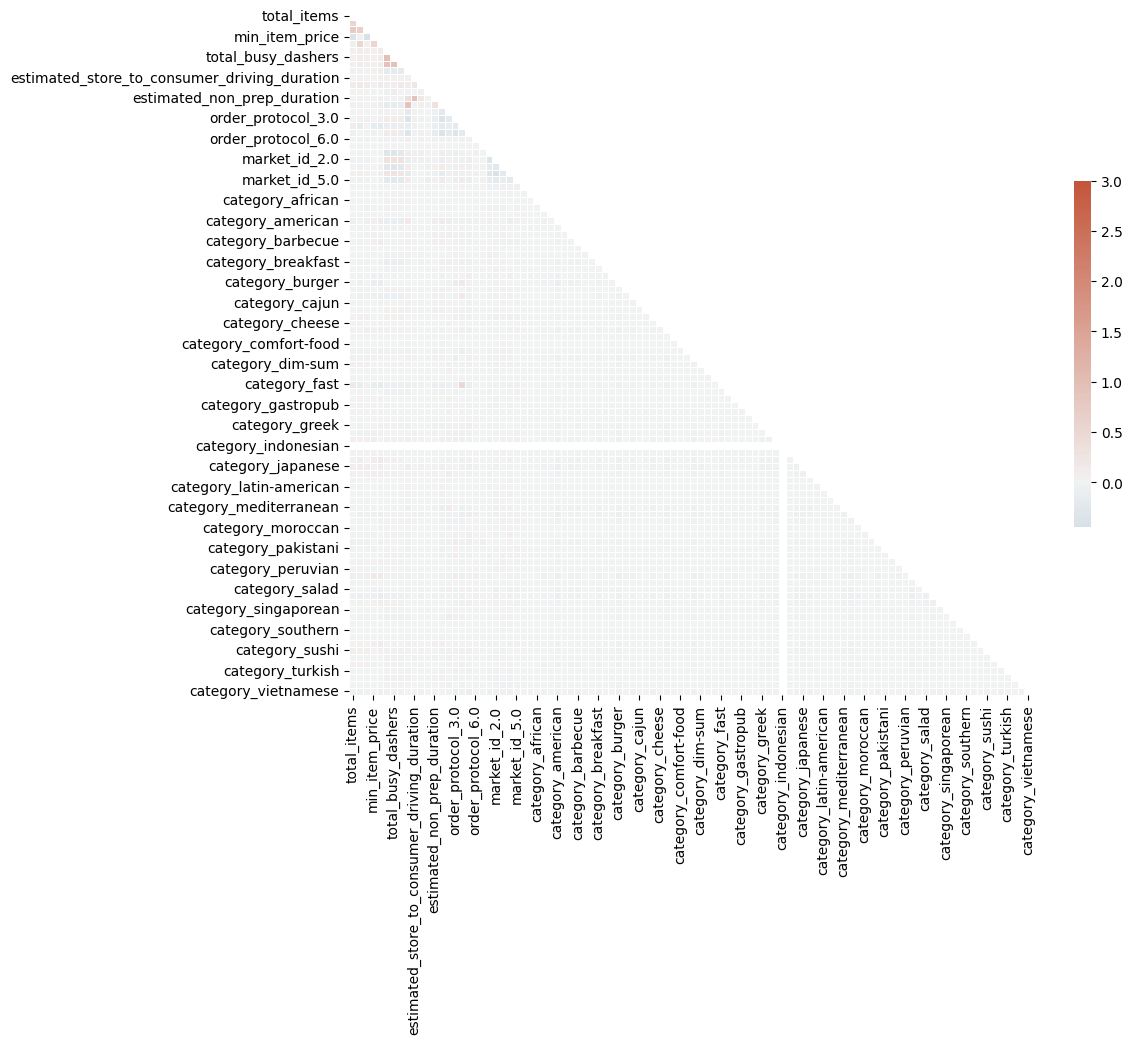

In [29]:
# Generate a mask for the upper triangle
corr = train_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, \
    vmax=3, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})

In [30]:
train_df['category_indonesian'].describe().T

count    177070.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: category_indonesian, dtype: float64

- This has a 0 std value. So it can be dropped.

### Two functions to test the correlations:
- Get redundant values
- Find top correlated features

In [31]:
def get_redundant_pairs(df):
    """Get diagonal and lower triangular pairs of correlation matrix"""
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    """Sort correlations in the descending order and return n highest results"""
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [32]:
print('Top Absolute Correlations')
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
total_onshift_dashers                         total_busy_dashers             0.941741
                                              total_outstanding_orders       0.934639
total_busy_dashers                            total_outstanding_orders       0.931295
estimated_store_to_consumer_driving_duration  estimated_non_prep_duration    0.923086
estimated_order_place_duration                order_protocol_1.0             0.897645
total_items                                   num_distinct_items             0.758146
subtotal                                      num_distinct_items             0.682890
total_items                                   subtotal                       0.557175
min_item_price                                max_item_price                 0.541241
subtotal                                      max_item_price                 0.507947
order_protocol_4.0                            category_fast                  0.489946
num_distinct_items          

- total_onshift_dashers and total_busy_dashers are maxxx correlated. Drop one of them.
- estimated_store_to_consumer_driving_duration and estimated_non_prep_duration are correlated. Drop the one we created and keep the original
- market_ids 2 & 4 and 1 & 2 are correlated. Drop them too.
- Re-create the train_df

In [33]:
train_df = historical_data.drop(columns = ["created_at", "market_id", "store_id", "store_primary_category", "actual_delivery_time", 
                                        "nan_free_store_primary_category", "order_protocol"])

# don't add market_id
train_df = pd.concat([train_df, order_protocol_dummies, store_primary_category_dummies], axis=1)

# drop highly correlated features
train_df = train_df.drop(columns=['total_onshift_dashers', 'total_busy_dashers', \
    'category_indonesian', 'estimated_non_prep_duration'])

# align dtype over dataset
train_df = train_df.astype('float32')

# replace inf values with NaN and drop them
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)

train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ratio,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3779.0,0.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4024.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,1781.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,3075.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,2390.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
train_df.shape

(177070, 90)

In [35]:
print('Top Absolute Correlations')
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
estimated_order_place_duration  order_protocol_1.0    0.897645
total_items                     num_distinct_items    0.758146
subtotal                        num_distinct_items    0.682890
total_items                     subtotal              0.557175
min_item_price                  max_item_price        0.541241
subtotal                        max_item_price        0.507947
order_protocol_4.0              category_fast         0.489946
num_distinct_items              min_item_price        0.446733
total_items                     min_item_price        0.389277
order_protocol_1.0              order_protocol_3.0    0.373581
estimated_order_place_duration  order_protocol_3.0    0.364170
order_protocol_1.0              order_protocol_5.0    0.342345
estimated_order_place_duration  order_protocol_5.0    0.333291
order_protocol_3.0              order_protocol_5.0    0.332533
order_protocol_1.0              order_protocol_2.0    0.226903
estimated_order_place_duratio

- We still have a lot of correlation.
- Look at order protocols, they're a mess. Remove them and re-run

In [36]:
train_df = historical_data.drop(columns = ["created_at", "market_id", "store_id", "store_primary_category", "actual_delivery_time", 
                                        "nan_free_store_primary_category", "order_protocol"])

# don't add market_id
train_df = pd.concat([train_df, store_primary_category_dummies], axis=1)

# drop highly correlated features
train_df = train_df.drop(columns=['total_onshift_dashers', 'total_busy_dashers', \
    'category_indonesian', 'estimated_non_prep_duration'])

# align dtype over dataset
train_df = train_df.astype('float32')

# replace inf values with NaN and drop them
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)

print('Top Absolute Correlations')
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
total_items                                   num_distinct_items                0.758146
subtotal                                      num_distinct_items                0.682890
total_items                                   subtotal                          0.557175
min_item_price                                max_item_price                    0.541241
subtotal                                      max_item_price                    0.507947
num_distinct_items                            min_item_price                    0.446733
total_items                                   min_item_price                    0.389277
estimated_store_to_consumer_driving_duration  actual_total_delivery_duration    0.188418
subtotal                                      actual_total_delivery_duration    0.172312
total_outstanding_orders                      estimated_order_place_duration    0.171049
total_items                                   category_fast                     0.17

- Still a lot of correlation.
- But we won't drop the total_items or total distinct items as it could affect the duration of the preparation process.
- We need to use feature engineering i.e., we will create new columns to infer the contribution of these columns.
- **The aim is to simplify the model and increase its accuracy by using new variables as predictors.**

In [37]:
# new features
train_df['percent_distinct_item_of_total'] = train_df['num_distinct_items'] / train_df['total_items']
train_df['avg_price_per_item'] = train_df['subtotal'] / train_df['total_items']
train_df.drop(columns=['num_distinct_items', 'subtotal'], inplace=True)
print('Top Absolute Correlations')
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
min_item_price                                avg_price_per_item                0.860580
max_item_price                                avg_price_per_item                0.770382
min_item_price                                max_item_price                    0.541241
total_items                                   percent_distinct_item_of_total    0.445751
                                              min_item_price                    0.389277
                                              avg_price_per_item                0.310759
percent_distinct_item_of_total                avg_price_per_item                0.226711
category_pizza                                avg_price_per_item                0.225510
estimated_store_to_consumer_driving_duration  actual_total_delivery_duration    0.188418
max_item_price                                percent_distinct_item_of_total    0.178021
category_fast                                 avg_price_per_item                0.17

- there are issues with min and max item price.
- Create range of item price using max - min and drop both.

In [38]:
train_df['price_range_of_items'] = train_df['max_item_price'] - train_df['min_item_price']
train_df.drop(columns=['max_item_price', 'min_item_price'], inplace=True)
print('Top Absolute Correlations')
print(get_top_abs_correlations(train_df, 20))

Top Absolute Correlations
total_items                                   percent_distinct_item_of_total    0.445751
                                              price_range_of_items              0.333304
                                              avg_price_per_item                0.310759
percent_distinct_item_of_total                avg_price_per_item                0.226711
category_pizza                                avg_price_per_item                0.225510
estimated_store_to_consumer_driving_duration  actual_total_delivery_duration    0.188418
category_fast                                 avg_price_per_item                0.175950
total_outstanding_orders                      estimated_order_place_duration    0.171049
total_items                                   category_fast                     0.170988
category_italian                              avg_price_per_item                0.158193
total_outstanding_orders                      actual_total_delivery_duration    0.15

In [39]:
train_df.shape

(177070, 82)

- The max correlation is less than 0.5 which is good
- We also have brought down the number of features from 100 to 82

# Multicollinearity and Feature Selection

### What is multi-collinearity?
When one predictor variable in a multiple regression model can be predicted from other predictor variables, the variables are said to be multi-collinear. Essentially, multiple variables are correlated with each other. This makes it harder to interpret our model and may cause other problems like overfitting.

We will use Variance Inflation Factor to quantify the **severity** of multicollinearity

- Compute Variance Inflation Factor (VIF) score
- Remove features which have a VIF score > 20

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
# Custom function
def compute_vif(features):
    vif_data = pd.DataFrame()
    vif_data['feature'] = features
    vif_data['VIF'] = [variance_inflation_factor(train_df[features].values, i) for i in range(len(features))]
    return vif_data.sort_values(by=['VIF']).reset_index(drop=True)

In [42]:
# apply VIF computation to all columns
features = train_df.drop(columns=['actual_total_delivery_duration']).columns.to_list()
vif_data = compute_vif(features)
vif_data

,feature,VIF
0,category_alcohol-plus-food,1.000373
1,category_chocolate,1.000508
2,category_belgian,1.000771
3,category_russian,1.003245
4,category_african,1.003825
...,...,...
76,busy_dashers_ratio,6.369577
77,category_american,7.033606
78,estimated_store_to_consumer_driving_duration,7.210893
79,estimated_order_place_duration,13.470942


- Looks like `percent_distinct_item_of_total` is the only feature with VIF > 20
- We will remove it and also check for multicollinearity in the remaining features and repeat the process
- For this, we need a loop; here we're using a `while` loop

In [43]:
multicollinearity = True

while multicollinearity:
    highest_vf_feature = vif_data['feature'].values.tolist()[-1] # since VIF is in ascending order
    print("Removing ", highest_vf_feature)
    features.remove(highest_vf_feature)
    vif_data = compute_vif(features)
    multicollinearity = False if len(vif_data[vif_data['VIF'] > 20]) == 0 else True

selected_features = vif_data['feature'].values.tolist()
vif_data


Removing  percent_distinct_item_of_total


,feature,VIF
0,category_alcohol-plus-food,1.000224
1,category_chocolate,1.000377
2,category_belgian,1.000472
3,category_russian,1.002037
4,category_gluten-free,1.002381
...,...,...
75,category_american,4.505930
76,avg_price_per_item,5.958989
77,busy_dashers_ratio,6.357856
78,estimated_store_to_consumer_driving_duration,7.192701


- It was enough to just drop `percent_distinct_item_of_total`.

## Feature Selection
### Rationale:
- Feature selection works to reduce the dimensions of a dataset, and getting rid of the features that don't have a significant effect on the model. It also helps our algorithm to run faster.
- Two popular ways to do feature selection are **PCA** and **Random Forest Regressors**
- RFR gives out the Gini-Index importance of each feature
### Gini Index:
- Gini index is a measure of impurity used for splitting nodes in the decision trees that make up the Random Forest
- It quantifies the degree of class mixing within a node by calculating the probability of misclassifying a randomly chosen sample in the node.
- The Gini index is minimized when a node contains pure samples of a single class, and it is used as a criterion to determine the optimal splits in the decision trees during the construction of the random forest.


In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# selected features are selected in multicollinearity check part
X = train_df[selected_features]
y = train_df['actual_total_delivery_duration']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

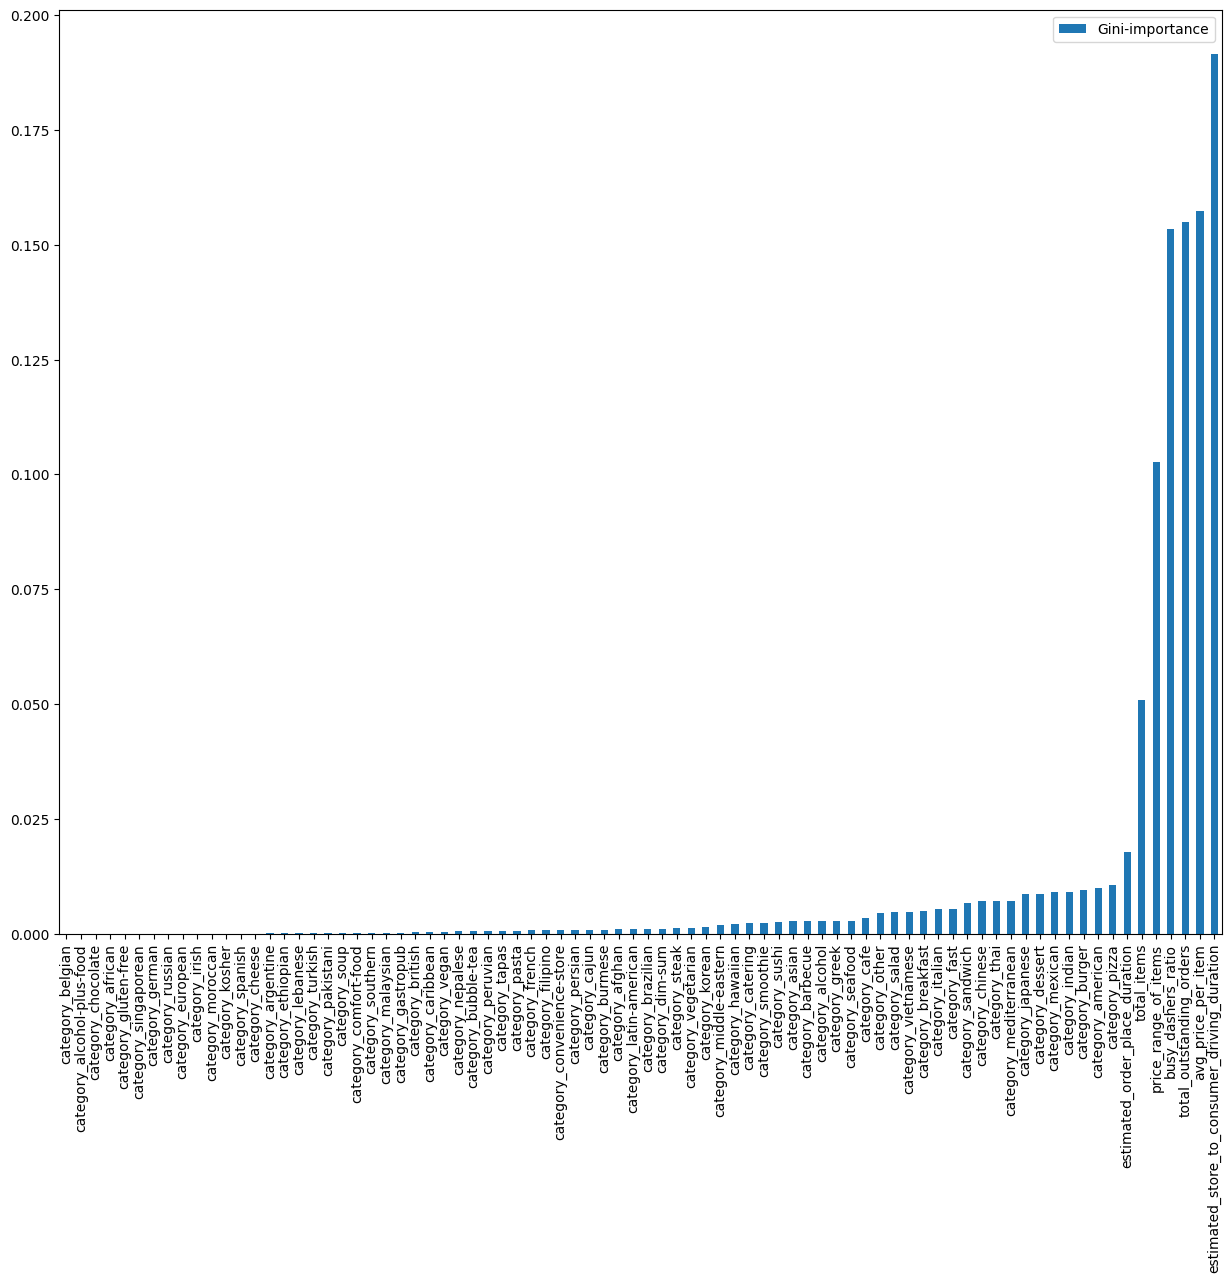

In [45]:
feature_names = [f"feature {i}" for i in range((X.shape[1]))]
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, forest.feature_importances_):
    feats[feature] = importance # add the name/value pair
importances = pd.DataFrame.from_dict(feats, orient = 'index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(15, 12))
plt.show()

<Axes: >

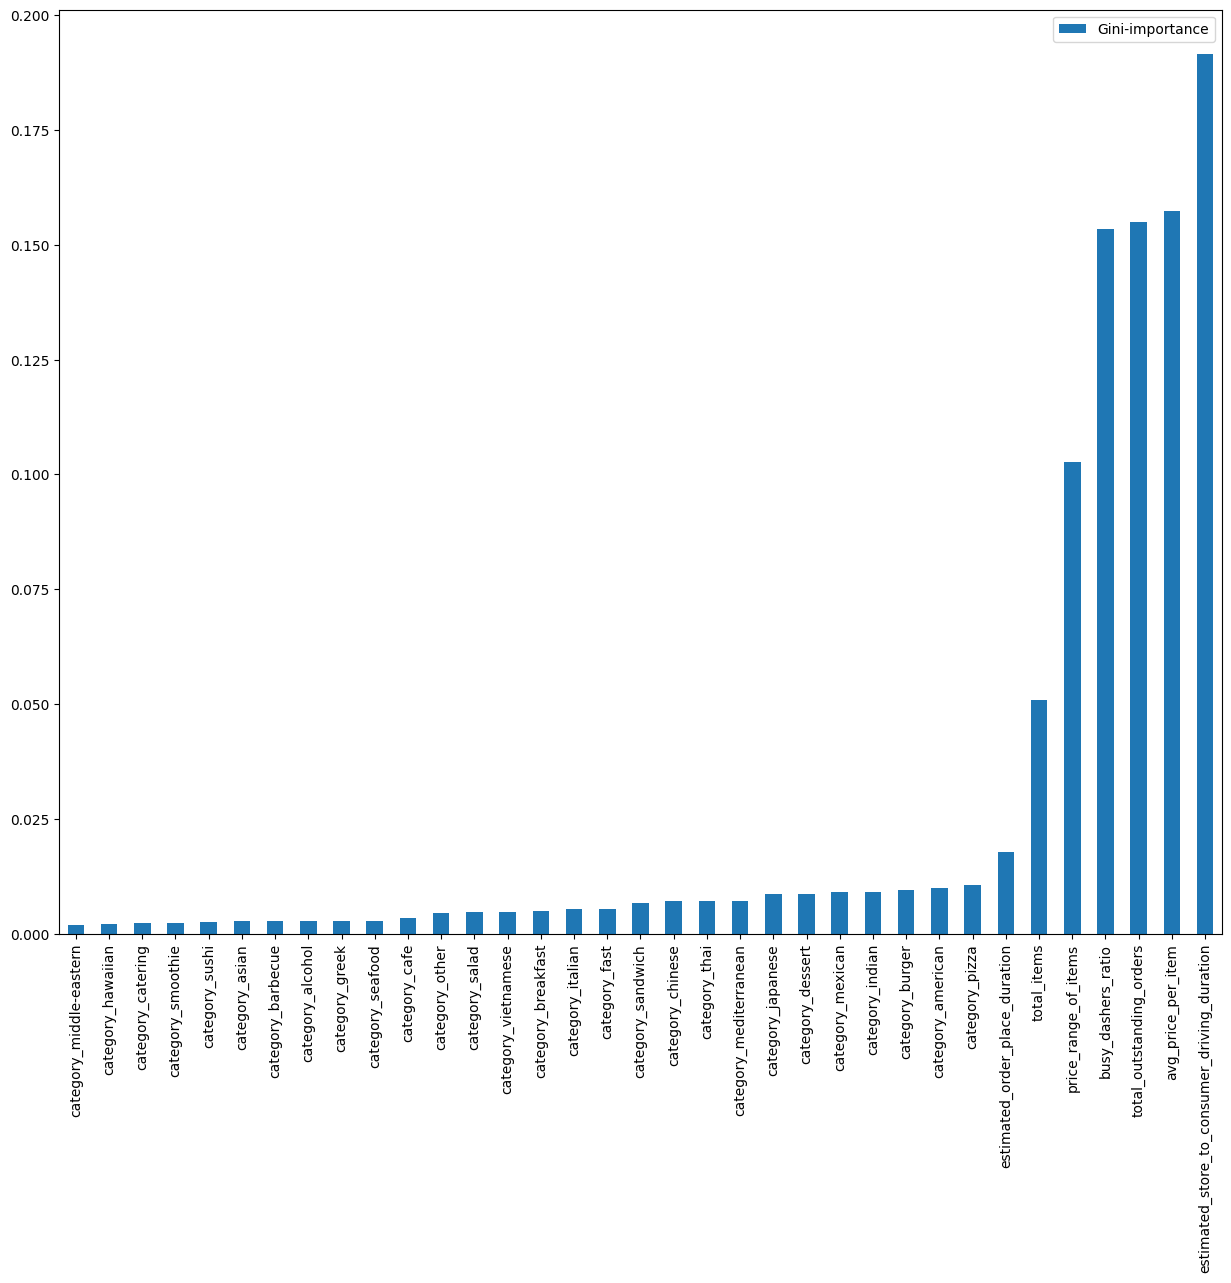

In [46]:
# check the most important ones
importances.sort_values(by='Gini-importance')[-35:].plot(kind='bar', figsize=(15,12))

In [47]:
# obtaining the columns names as text
importances.sort_values(by='Gini-importance')[-35:].index.tolist()

['category_middle-eastern',
 'category_hawaiian',
 'category_catering',
 'category_smoothie',
 'category_sushi',
 'category_asian',
 'category_barbecue',
 'category_alcohol',
 'category_greek',
 'category_seafood',
 'category_cafe',
 'category_other',
 'category_salad',
 'category_vietnamese',
 'category_breakfast',
 'category_italian',
 'category_fast',
 'category_sandwich',
 'category_chinese',
 'category_thai',
 'category_mediterranean',
 'category_japanese',
 'category_dessert',
 'category_mexican',
 'category_indian',
 'category_burger',
 'category_american',
 'category_pizza',
 'estimated_order_place_duration',
 'total_items',
 'price_range_of_items',
 'busy_dashers_ratio',
 'total_outstanding_orders',
 'avg_price_per_item',
 'estimated_store_to_consumer_driving_duration']

## Checking feature importance using PCA
### Rationale:
- PCA can help determine the number of features required to explain a certain percentage of data.
- For eg., 50 features are required to represent 60% of the data.
- We can set a threshold on the percentage explainability and determine the number of features required.

/var/folders/wg/8yz1tny10yl9ct8bq7zl3pp00000gn/T/ipykernel_8166/1689002806.py:11: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,81,1)


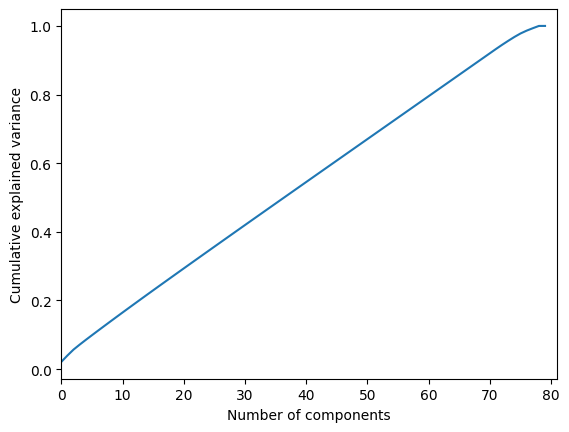

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_Train = X_train.values # changing from t to T
X_Train = np.asarray(X_Train)

# Finding normalised array of X_train
X_std = StandardScaler().fit_transform(X_Train)
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,81,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

- PCA shows that we need to use at least 60 representative features to explain 80% of the dataset, which makes the PCA transformation useless since we already have 80 and could select the most important ones based on feature importance.
- However, if PCA would tell us it can explain the majority of variance with around 10 features - high reduction - we would continue with it.

# Scaling
### Rationale:
- For developing a model for further interpretation, scaling is important to ensure that feature values are proportionally adjusted to fit within a specified range (typically between 0 and 1)
- Effect of scaling on Gradient Descent: When features have different scales, gradient descent may take longer to converge or not converge at all. Feature scaling such as normalization or standardization, ensures that all features are on a similar scale, allowing gradient descent to avoid disporoportionately large updates based on features with large values.

### We will try two Scalers
- MinMax Scaler (Normalization)
- Standard Scaler (Standardization)
    - Makes the mean 0

In [49]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [50]:
# Custom function which will work for both scalers

def scale(scaler, X, y):
    """Apply the selected scaler to features and target variables"""
    X_scaler = scaler
    X_scaler.fit(X=X, y=y)
    X_scaled = X_scaler.transform(X)

    y_scaler = scaler
    y_scaler.fit(y.values.reshape(-1,1))
    y_scaled = y_scaler.transform(y.values.reshape(-1,1))

    return X_scaled, y_scaled, X_scaler, y_scaler


In [51]:
# example to show how to use it
X_scaled, y_scaled, X_scaler, y_scaler = scale(MinMaxScaler(), X, y)

# train-test split after scaling
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# Inverse Transform for Metric Comparison
- Since we applied a scaler to training data, the predictions for test data will also be scaled.
- And to see the error in terms of seconds, we need to apply the inverse transformation.
- We will use Root Mean Squared Error to measure error. We could also use Mean Squared Error or Mean Absolute Error.
- We gave our decision based on the sensitivity of RMSE for high error terms. In our thought, the consumer patience with delaying delivery could decrease exponentially with time.
- The detailed comparison of MAE, MSE, and, RMSE could be found here: https://towardsdatascience.com/comparing-robustness-of-mae-mse-and-rmse-6d69da870828

In [52]:
from sklearn.metrics import mean_squared_error

def rmse_with_inv_transform(scaler, y_test, y_pred_scaled, model_name):
    """Convert the scaled error to actual error"""
    y_predict = scaler.inverse_transform(y_pred_scaled.reshape(-1,1))
    # return RMSE with squared False
    rmse_error = mean_squared_error(y_test, y_predict[:,0], squared=False) # squared : bool, default=True. If True returns MSE value, if False returns RMSE value.
    print("Error = "'{}'.format(rmse_error) + " in " + model_name)

    return rmse_error, y_predict

# Classical Machine Learning

- We will:
    - Apply 6 different algorithms to help us find the best performance model.
    - Apply 4 different feature set sizes - full, 40, 20 and 10 (selected by Gini importance)
    - Use 3 different scalers - Standard, MinMax and No Scalar.
- We will get 6 x 4 x 3 = 72 results.

In [53]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import tree, svm, neighbors, linear_model

In [54]:
# Create a generic function which can work with multiple ML models

def make_regression(X_train, y_train, X_test, y_test, model, model_name, verbose=True):
    """Apply selected regression model to data and measure error"""
    model.fit(X_train, y_train)
    
    y_predict = model.predict(X_train) # predictions on the training data itself, not test data
    train_error = mean_squared_error(y_train, y_predict, squared=False)
    
    y_predict = model.predict(X_test) # predictions on the test data
    test_error = mean_squared_error(y_test, y_predict, squared=False)

    if verbose:
        print("Train Error = "'{}'.format(train_error) + " " + model_name)
        print("Test Error = "'{}'.format(test_error) + " " + model_name)
    trained_model = model

    return trained_model, y_predict, train_error, test_error

- We will now apply several regression tasks and calculate error for each task
- We will collect the results in 4 different dictionaries as follows

In [55]:
pred_dict = {
    'regression_model': [],
    'feature_set': [],
    'scaler_name': [],
    'RMSE': [],
}

regression_models = {
    'Ridge': linear_model.Ridge(),
    'DecisionTree': tree.DecisionTreeRegressor(max_depth=6),
    'RandomForest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'LGBM': LGBMRegressor(),
    'MLP': MLPRegressor(), # Multi-Layer Perceptron
}

feature_sets = {
    'full_dataset': X.columns.to_list(),
    'selected_features_40': importances.sort_values(by='Gini-importance')[-40:].index.tolist(),
    'selected_features_20': importances.sort_values(by='Gini-importance')[-20:].index.tolist(),
    'selected_features_10': importances.sort_values(by='Gini-importance')[-10:].index.tolist(),
}

scalers = {
    'Standard scaler': StandardScaler(),
    'MinMax scaler': MinMaxScaler(),
    'NotScale': None,
}

In [56]:
# examine the error for each combination

for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f"-----scaled with {scaler_name}----- included columns are {feature_set_name}")
        print("")
        for model_name in regression_models.keys():
            if scaler_name == "NotScale":
                X = train_df[feature_set]
                y = train_df['actual_total_delivery_duration']
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.2, random_state=42
                )
                make_regression(X_train, y_train, X_test, y_test, regression_models[model_name], \
                    model_name, verbose=True)
            else:
                X_scaled, y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name], X[feature_set], y)
                X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
                    X_scaled, y_scaled, test_size = 0.2, random_state=42
                )
                _, y_predict_scaled, _, _ = make_regression(X_train_scaled, y_train_scaled[:,0], \
                    X_test_scaled, y_test_scaled[:,0], regression_models[model_name], model_name, \
                        verbose=False)
                rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test,  y_predict_scaled, \
                    model_name)
            
            pred_dict['regression_model'].append(model_name)
            pred_dict['feature_set'].append(feature_set_name)
            pred_dict['scaler_name'].append(scaler_name)
            pred_dict['RMSE'].append(rmse_error)


-----scaled with Standard scaler----- included columns are full_dataset

Error = 2053.69873046875 in Ridge
Error = 2057.2476687088733 in DecisionTree
Error = 2049.6539815138963 in RandomForest
Error = 2036.2498779296875 in XGBoost
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1537
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 70
[LightGBM] [Info] Start training from score -0.002379
Error = 2033.4355809987908 in LGBM
Error = 2038.49609375 in MLP
-----scaled with MinMax scaler----- included columns are full_dataset

Error = 2053.962890625 in Ridge
Error = 2057.2476685732177 in DecisionTree
Error = 2048.743093395531 in RandomForest
Error = 2035.351318359375 in XGBoost
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the over

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.4253e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train Error = 1067.7815291116704 DecisionTree
Test Error = 2057.2476684096064 DecisionTree
Train Error = 394.84571129933397 RandomForest
Test Error = 2049.3786033052966 RandomForest
Train Error = 968.2471313476562 XGBoost
Test Error = 2036.43212890625 XGBoost
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1472
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 70
[LightGBM] [Info] Start training from score 2851.342096
Train Error = 1017.5549840201221 LGBM
Test Error = 2034.461097275308 LGBM


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Error = 1055.3770751953125 MLP
Test Error = 2046.9595947265625 MLP
-----scaled with Standard scaler----- included columns are selected_features_40

Error = 2054.00439453125 in Ridge
Error = 2056.5292024696128 in DecisionTree
Error = 2048.115779376782 in RandomForest
Error = 2035.453369140625 in XGBoost
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1447
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 40
[LightGBM] [Info] Start training from score -0.002379
Error = 2034.6538984910121 in LGBM
Error = 2035.874267578125 in MLP
-----scaled with MinMax scaler----- included columns are selected_features_40

Error = 2054.27734375 in Ridge
Error = 2056.5292023632996 in DecisionTree
Error = 2050.1059609143044 in RandomForest
Error = 2034.28

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.55922e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train Error = 1067.785563647774 DecisionTree
Test Error = 2056.529202224364 DecisionTree
Train Error = 398.2835632637228 RandomForest
Test Error = 2048.136685221403 RandomForest
Train Error = 965.6858520507812 XGBoost
Test Error = 2035.7642822265625 XGBoost
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1412
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 40
[LightGBM] [Info] Start training from score 2851.342096
Train Error = 1017.1430421117441 LGBM
Test Error = 2034.8058530174258 LGBM


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Error = 1054.48876953125 MLP
Test Error = 2047.0018310546875 MLP
-----scaled with Standard scaler----- included columns are selected_features_20

Error = 2055.36572265625 in Ridge
Error = 2054.610311207463 in DecisionTree
Error = 2050.9492910083545 in RandomForest
Error = 2037.6336669921875 in XGBoost
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 20
[LightGBM] [Info] Start training from score -0.002379
Error = 2036.0233846729805 in LGBM
Error = 2037.358154296875 in MLP
-----scaled with MinMax scaler----- included columns are selected_features_20

Error = 2055.653076171875 in Ridge
Error = 2054.6103112689557 in DecisionTree
Error = 2048.248500322839 in RandomForest
Error = 2036.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.43857e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train Error = 1069.1350906055598 DecisionTree
Test Error = 2054.610311170708 DecisionTree
Train Error = 395.7491717163137 RandomForest
Test Error = 2047.7325322879778 RandomForest
Train Error = 966.1651000976562 XGBoost
Test Error = 2036.249267578125 XGBoost
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1372
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 20
[LightGBM] [Info] Start training from score 2851.342096
Train Error = 1018.9600610110249 LGBM
Test Error = 2035.9494403356318 LGBM


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Error = 1057.301513671875 MLP
Test Error = 2049.26953125 MLP
-----scaled with Standard scaler----- included columns are selected_features_10

Error = 2056.568359375 in Ridge
Error = 2054.5971761770547 in DecisionTree
Error = 2053.839258875766 in RandomForest
Error = 2040.27001953125 in XGBoost
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1357
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 10
[LightGBM] [Info] Start training from score -0.002379
Error = 2038.1313604554389 in LGBM
Error = 2040.5045166015625 in MLP
-----scaled with MinMax scaler----- included columns are selected_features_10

Error = 2056.882080078125 in Ridge
Error = 2054.5971762373274 in DecisionTree
Error = 2051.721077403059 in RandomForest
Error = 2039.515625 

In [57]:
pred_df = pd.DataFrame(pred_dict)
pred_df

,regression_model,feature_set,scaler_name,RMSE
0,Ridge,full_dataset,Standard scaler,2053.698730
1,DecisionTree,full_dataset,Standard scaler,2057.247669
2,RandomForest,full_dataset,Standard scaler,2049.653982
3,XGBoost,full_dataset,Standard scaler,2036.249878
4,LGBM,full_dataset,Standard scaler,2033.435581
...,...,...,...,...
67,DecisionTree,selected_features_10,NotScale,2104.643555
68,RandomForest,selected_features_10,NotScale,2104.643555
69,XGBoost,selected_features_10,NotScale,2104.643555
70,LGBM,selected_features_10,NotScale,2104.643555


<Axes: >

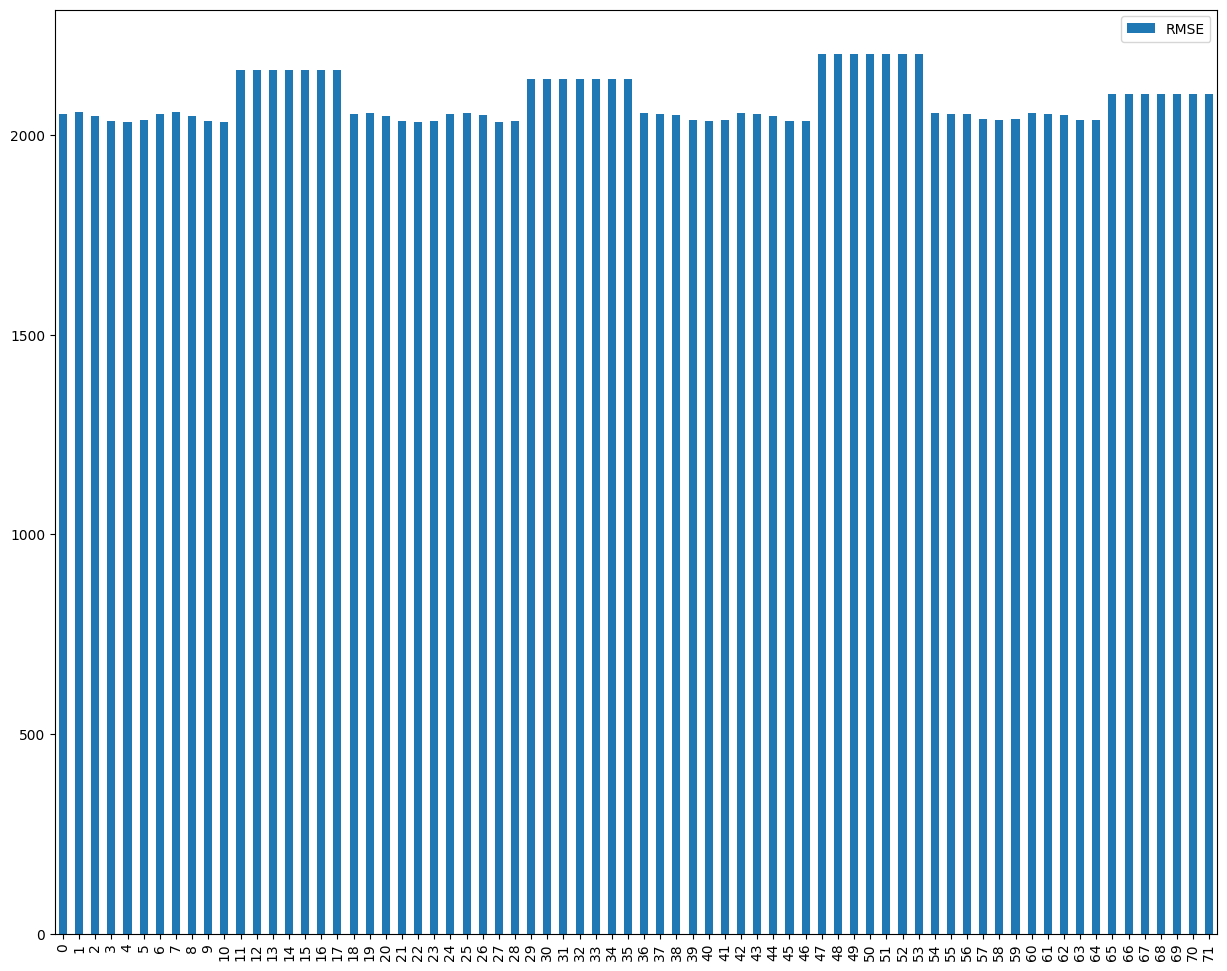

In [58]:
pred_df.plot(kind='bar', figsize=(15,12))

- It seems we have high errors in all models.
- Also, the models inform us that to not scale affects the performance negatively. We could pick one of the scalers and continue since it doesn't affect the performance much.
- The decrease in training feature size first slightly improves the performance and then marginally made it worse. We choose to use 40 as a final decision.
- When we examine the model performances, the most significant thing is the error rates. What could we do more to improve it?
- Could it be our dataset is **not a good representative** for estimating the total delivery duration?

## Changing the problem a bit
Let's predict the prep_duration (a created variable) which will the difference between `actual_total_delivery_duration` and the non-prep activities duration.

In [60]:
train_df['prep_time'] = train_df['actual_total_delivery_duration'] \
    - train_df['estimated_order_place_duration'] - train_df['estimated_order_place_duration']

scalers = {
    'Standard Scaler': StandardScaler(),
}

feature_sets = {
    'selected_features_40': importances.sort_values(by='Gini-importance')[-40:].index.tolist()
}

for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f"-----scaled with {scaler_name}----- included columns are {feature_set_name}")
        print("")
        for model_name in regression_models.keys():
            # drop estimated_store_to_consumer_driving_duration and estimated_order_place_duration
            X = train_df[feature_set].drop(columns=['estimated_store_to_consumer_driving_duration', \
                'estimated_order_place_duration'])
            y = train_df['prep_time']

            # to get indices
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=42
            )
            train_indices = X_train.index
            test_indices = X_test.index

            # scale
            X_scaled, y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name], X, y)

            # apply indexing
            X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
                X_scaled, y_scaled, test_size=0.2, random_state=42
            )
            _, y_predict_scaled, _, _ = make_regression(X_train_scaled, y_train_scaled[:,0], X_test_scaled, \
                y_test_scaled[:,0], regression_models[model_name], model_name, verbose=False)
            rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test, y_predict_scaled, model_name)

            pred_dict['regression_model'].append(model_name)
            pred_dict['feature_set'].append(feature_set_name)
            pred_dict['scaler_name'].append(scaler_name)
            pred_dict['RMSE'].append(rmse_error)

-----scaled with Standard Scaler----- included columns are selected_features_40

Error = 2071.3193359375 in Ridge
Error = 2064.1583962635023 in DecisionTree
Error = 2063.708946354676 in RandomForest
Error = 2053.066162109375 in XGBoost
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1163
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 38
[LightGBM] [Info] Start training from score -0.002552
Error = 2052.763010500947 in LGBM
Error = 2056.515380859375 in MLP


- LGBM performs the best among all models.
- Repeat the process just for that model alone.

In [61]:
scalers = {
    'Standard Scaler': StandardScaler(),
}

feature_sets = {
    'selected_features_40': importances.sort_values(by='Gini-importance')[-40:].index.tolist()
}

regression_models = {
    'LGBM': LGBMRegressor(),
}

for feature_set_name in feature_sets.keys():
    feature_set = feature_sets[feature_set_name]
    for scaler_name in scalers.keys():
        print(f"-----scaled with {scaler_name}----- included columns are {feature_set_name}")
        print("")
        for model_name in regression_models.keys():
            # drop estimated_store_to_consumer_driving_duration and estimated_order_place_duration
            X = train_df[feature_set].drop(columns=['estimated_store_to_consumer_driving_duration', \
                'estimated_order_place_duration'])
            y = train_df['prep_time']

            # to get indices
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=42
            )
            train_indices = X_train.index
            test_indices = X_test.index

            # scale
            X_scaled, y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name], X, y)

            # apply indexing
            X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
                X_scaled, y_scaled, test_size=0.2, random_state=42
            )
            _, y_predict_scaled, _, _ = make_regression(X_train_scaled, y_train_scaled[:,0], X_test_scaled, \
                y_test_scaled[:,0], regression_models[model_name], model_name, verbose=False)
            rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test, y_predict_scaled, model_name)

            pred_dict['regression_model'].append(model_name)
            pred_dict['feature_set'].append(feature_set_name)
            pred_dict['scaler_name'].append(scaler_name)
            pred_dict['RMSE'].append(rmse_error)

-----scaled with Standard Scaler----- included columns are selected_features_40

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1163
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 38
[LightGBM] [Info] Start training from score -0.002552
Error = 2052.763010500947 in LGBM


In [63]:
# Excracting Predictions from the best performing model
pred_values_dict = {
    'actual_total_delivery_duration': train_df['actual_total_delivery_duration'][test_indices].values.tolist(),
    'prep_duration_prediction': y_predict[:,0].tolist(),
    'estimated_store_to_consumer_driving_duration': train_df['estimated_store_to_consumer_driving_duration'] \
        [test_indices].values.tolist(),
    'estimated_order_place_duration': train_df['estimated_order_place_duration'][test_indices].values.tolist(),
}

In [64]:
# Converting to dataframe from dict
values_df = pd.DataFrame.from_dict(pred_values_dict)
values_df

,actual_total_delivery_duration,prep_duration_prediction,estimated_store_to_consumer_driving_duration,estimated_order_place_duration
0,2448.0,1929.168417,380.0,251.0
1,1839.0,1682.649684,747.0,446.0
2,1927.0,2376.807852,543.0,251.0
3,2657.0,1531.337771,445.0,251.0
4,3596.0,2237.349571,691.0,446.0
...,...,...,...,...
35409,9557.0,2932.175128,768.0,446.0
35410,1864.0,2373.824959,324.0,446.0
35411,2674.0,2093.882146,791.0,251.0
35412,2234.0,2163.224374,687.0,251.0


In [65]:
# sum the predictions up with non preparation activities such as order placing and driving.
values_df['sum_total_delivery_direction'] = values_df['prep_duration_prediction'] + \
    values_df['estimated_store_to_consumer_driving_duration'] + values_df['estimated_order_place_duration']
values_df

,actual_total_delivery_duration,prep_duration_prediction,estimated_store_to_consumer_driving_duration,estimated_order_place_duration,sum_total_delivery_direction
0,2448.0,1929.168417,380.0,251.0,2560.168417
1,1839.0,1682.649684,747.0,446.0,2875.649684
2,1927.0,2376.807852,543.0,251.0,3170.807852
3,2657.0,1531.337771,445.0,251.0,2227.337771
4,3596.0,2237.349571,691.0,446.0,3374.349571
...,...,...,...,...,...
35409,9557.0,2932.175128,768.0,446.0,4146.175128
35410,1864.0,2373.824959,324.0,446.0,3143.824959
35411,2674.0,2093.882146,791.0,251.0,3135.882146
35412,2234.0,2163.224374,687.0,251.0,3101.224374


In [67]:
# check new error rate
mean_squared_error(values_df['actual_total_delivery_duration'], values_df['sum_total_delivery_direction'], \
    squared=False)

2047.9078411118137

- The error is still high

# Another approach
What if we use another regression to obtain the actual total delivery duration instead of just summing up like above?

In [68]:
X = values_df[['prep_duration_prediction', 'estimated_store_to_consumer_driving_duration', \
    'estimated_order_place_duration']]
y = values_df['actual_total_delivery_duration']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [70]:
regression_models = {
    'LinearReg': linear_model.LinearRegression(),
    'Ridge': linear_model.Ridge(),
    'DecisionTree': tree.DecisionTreeRegressor(max_depth=6),
    'RandomForest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'LGBM': LGBMRegressor(),
    'MLP': MLPRegressor(),
}

for model_name in regression_models.keys():
    _, y_predict, _, _ = make_regression(
        X_train, y_train, X_test, y_test, regression_models[model_name], model_name, verbose=False
    )
    print('RMSE of: ', model_name, mean_squared_error(y_test, y_predict, squared=False))

RMSE of:  LinearReg 986.9820328991567
RMSE of:  Ridge 986.9820329035784
RMSE of:  DecisionTree 1233.993037103546
RMSE of:  RandomForest 1266.9957278980007
RMSE of:  XGBoost 2490.2711674487477
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000764 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 519
[LightGBM] [Info] Number of data points in the train set: 28331, number of used features: 3
[LightGBM] [Info] Start training from score 2869.174261
RMSE of:  LGBM 1037.3322000977241
RMSE of:  MLP 997.5176848422809


This approach has a better performance!

# Deep Learning
### Rationale:
Could Artificial Neural Networks have a better performance for the given problem? The first intuition is that MLP performance was not better than tree-based regression in the preparation duration prediction part. Hence, we doubt it. However, MLP has a good performance on the prediction of actual total delivery using preparation, driving, and order place duration. Let's give it a try

In [71]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
tf.random.set_seed(42)

# Neural Network
def create_model(feature_set_size):

    # define the model
    model = Sequential()
    model.add(Dense(16, input_dim=feature_set_size, activation='relu'))
    model.add(Dense(1, activation='linear'))

    # compile the model
    model.compile(optimizer='sgd', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model

In [72]:
print(f"-----scaled with {scaler_name}----- included columns are {feature_set_name}")
print("")
model_name = 'ANN'
scaler_name = 'Standard Scaler'
X = values_df[['prep_duration_prediction', 'estimated_store_to_consumer_driving_duration', \
    'estimated_order_place_duration']]
y = values_df['actual_total_delivery_duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_scaled, y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name], X, y)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)
print('feature_set_size:', X_train_scaled.shape[1])
model = create_model(feature_set_size = X_train_scaled.shape[1])
history = model.fit(X_train_scaled, y_train_scaled, epochs = 100, batch_size=64, verbose=1)
y_pred = model.predict(X_test_scaled)
rmse_error = rmse_with_inv_transform(y_scaler, y_test, y_pred, model_name)

pred_dict['regression_model'].append(model_name)
pred_dict['feature_set'].append(feature_set_name)
pred_dict['scaler_name'].append(scaler_name)
pred_dict['RMSE'].append(rmse_error)

-----scaled with Standard Scaler----- included columns are selected_features_40

feature_set_size: 3
Epoch 1/100
443/443 [==============================] - 0s 294us/step - loss: 1.1316 - root_mean_squared_error: 1.0638
Epoch 2/100
443/443 [==============================] - 0s 308us/step - loss: 1.1203 - root_mean_squared_error: 1.0584
Epoch 3/100
443/443 [==============================] - 0s 344us/step - loss: 1.1189 - root_mean_squared_error: 1.0578
Epoch 4/100
443/443 [==============================] - 0s 345us/step - loss: 1.1185 - root_mean_squared_error: 1.0576
Epoch 5/100
443/443 [==============================] - 0s 379us/step - loss: 1.1180 - root_mean_squared_error: 1.0573
Epoch 6/100
443/443 [==============================] - 0s 515us/step - loss: 1.1180 - root_mean_squared_error: 1.0573
Epoch 7/100
443/443 [==============================] - 0s 455us/step - loss: 1.1176 - root_mean_squared_error: 1.0572
Epoch 8/100
443/443 [==============================] - 0s 909us/step - lo

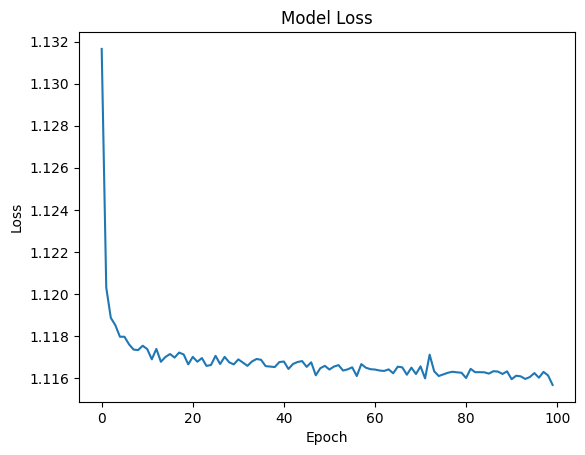

In [73]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()